In [2]:
#import os
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sep = os.sep

In [3]:
# Анализ оттока клиентов - Часть 2

In [4]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 месяцев'
    elif tenure < 25:
        return '12-24 месяцев'
    elif tenure < 48:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'

In [5]:
# Загрузить данные в DataFrame из csv-файла
df = pd.read_csv('Telco-Customer-Churn.csv')
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2252,2054-PJOCK,Female,0,No,No,60,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.55,4847.05,No
5634,0231-LXVAP,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,75.90,75.90,Yes


In [6]:
# Узнать уникальные значение в колонке
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [7]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

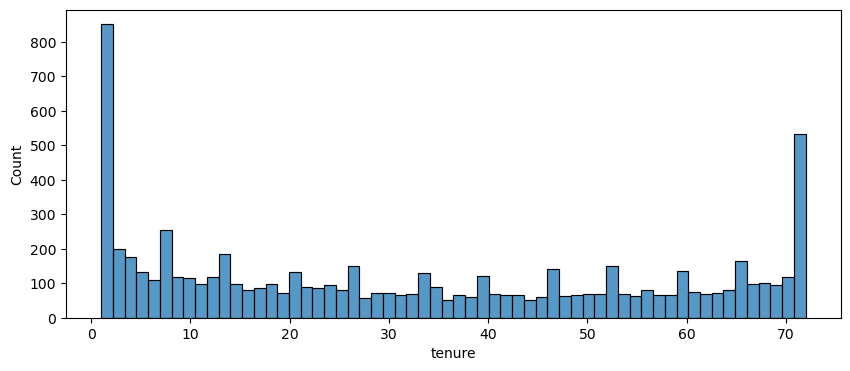

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график распределения 'Histogram': значений в колонке 'tenure'
sns.histplot(data=df, x='tenure', bins=60);

D:\ProgramFiles\Python\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


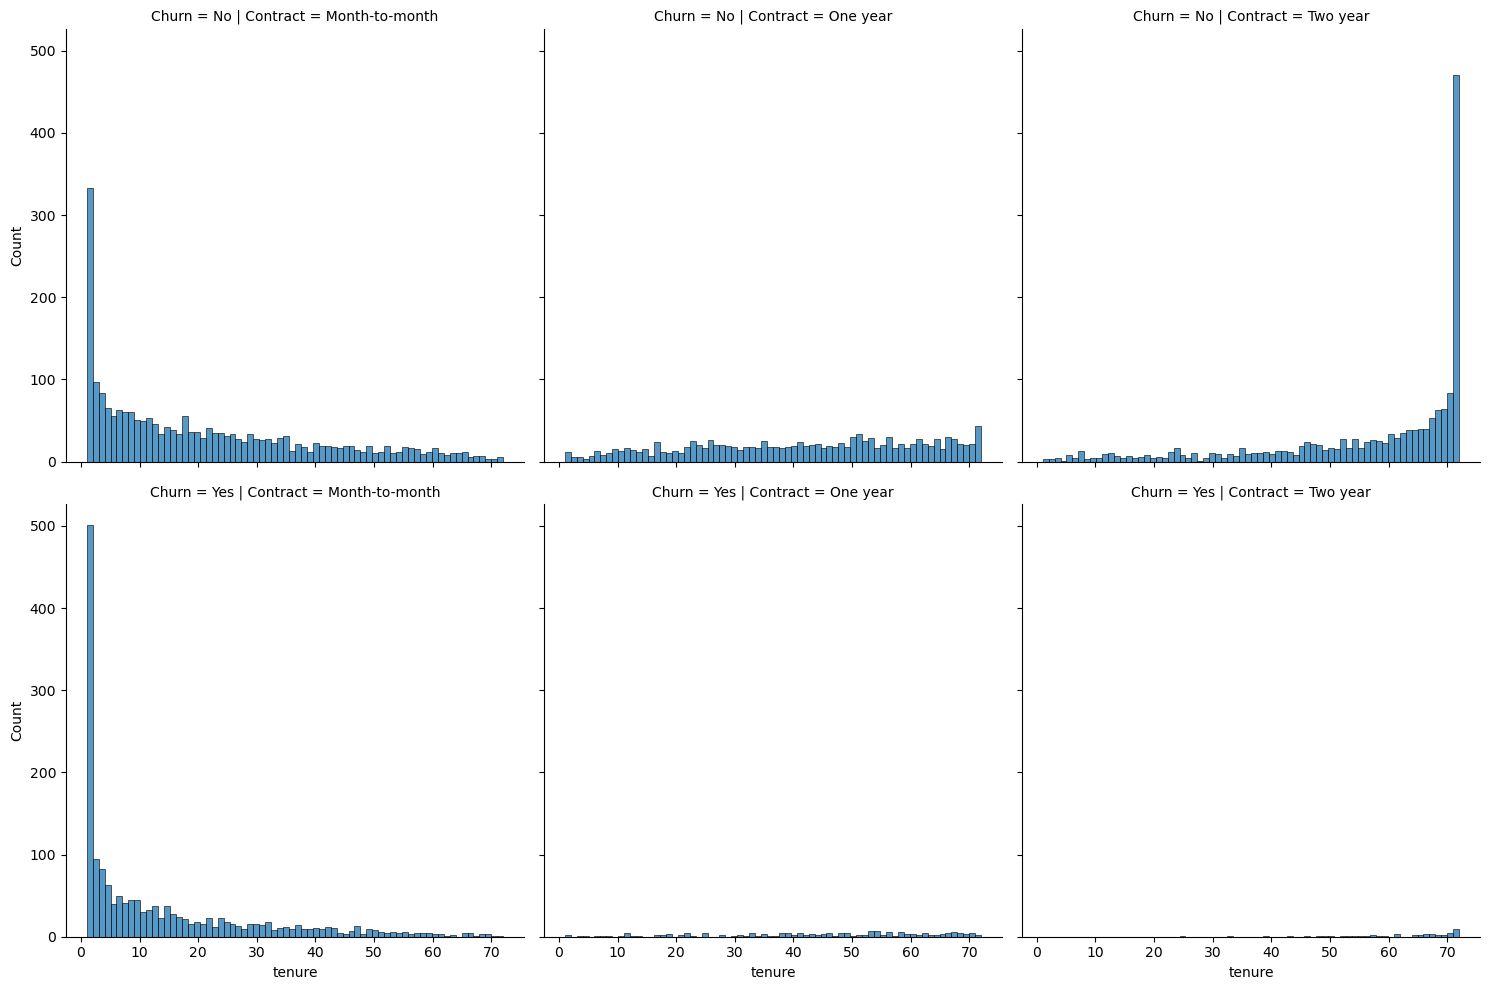

In [10]:
# Строим график: распределения 'Distribution' по колонке 'tenure'
# В первом ряду Churn='No'; Во втором ряду Churn='Yes'
# По колонкам три разных вида контрактов
sns.displot(data=df, x='tenure', col='Contract', row='Churn', bins=70);

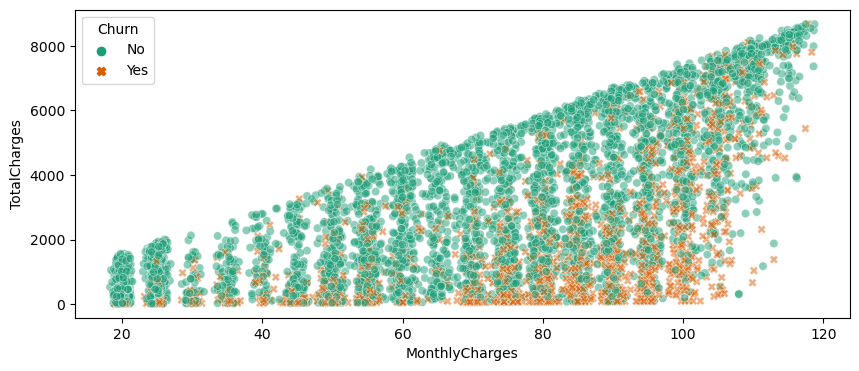

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния (между двумя переменными)
# hue: Колонка, разные значения которой раскрашиваются разным цветом
# style: Колонка, разные значения которой обознаются разнымы маркерами
# alpha: Уровень прозрачности точек
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', style='Churn', alpha=0.5, palette='Dark2');

In [12]:
# Создание когорт (сегментов) по колонке 'tenure'

In [13]:
# Вычислить количество тех кто ушел в отток, по каждому уникальному значению из колонки 'tenure'
yesChurn = df.groupby(['Churn', 'tenure']).count()  # count(): Кол-во строк
yesChurn = yesChurn.transpose()
yesChurn = yesChurn['Yes']
#yesChurn

In [14]:
# Вычислить количество тех кто остался, по каждому уникальному значению из колонки 'tenure'
noChurn = df.groupby(['Churn', 'tenure']).count()  # count(): Кол-во строк
noChurn = noChurn.transpose()
noChurn = noChurn['No']
#noChurn

In [15]:
# Вычислить процент тех кто ушел в отток, по каждому уникальному значению из колонки 'tenure'
churnRate = 100 * yesChurn / (yesChurn + noChurn)
churnRate = churnRate.transpose()['customerID']  # Можно взять  любую колонку (во всех колонках значения одинаковые)
churnRate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

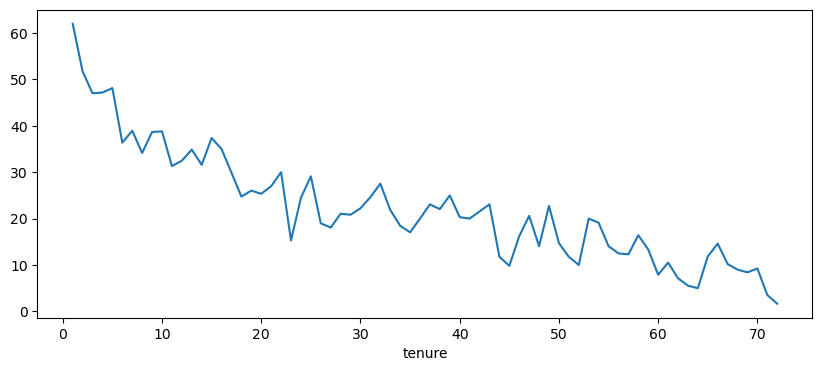

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: зависимость процент оттока, от количества месяцев (колонка 'tenure')
churnRate.plot();

In [17]:
# Группируем на более крупные когорты по колонке 'tenure'
# 1-ый год (0-12 месяцев); 2-ой год (13-24 месяцев); 3, 4 год (25-48 месяцев); больше 48 месяцев
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 месяцев
1,34,24-48 месяцев
2,2,0-12 месяцев
3,45,24-48 месяцев
4,2,0-12 месяцев
...,...,...
7027,24,12-24 месяцев
7028,72,Более 48 месяцев
7029,11,0-12 месяцев
7030,4,0-12 месяцев


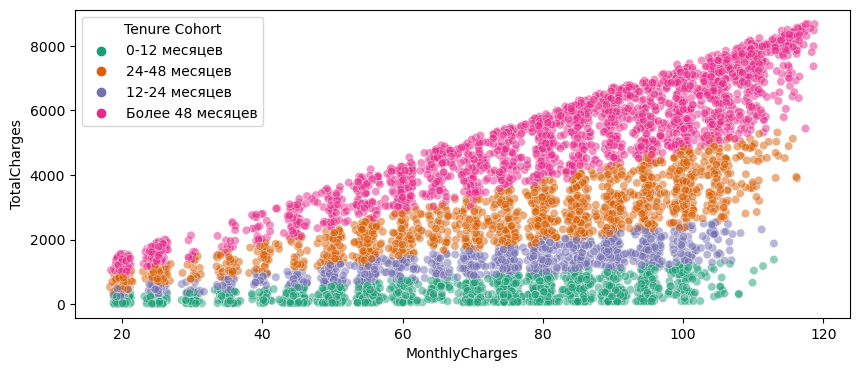

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график рассеяния (между двумя переменными)
# hue: Колонка, разные значения которой раскрашиваются разным цветом
# style: Колонка, разные значения которой обознаются разнымы маркерами
# alpha: Уровень прозрачности точек
sns.scatterplot(
    data=df, x='MonthlyCharges', y='TotalCharges',
    hue='Tenure Cohort', #style='Tenure Cohort',
    alpha=0.5, palette='Dark2'
);

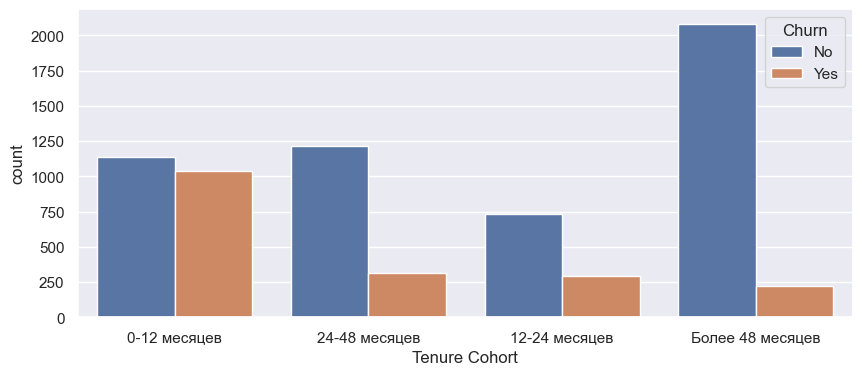

In [19]:
# Добавить сетку: 'darkgrid', 'whitegrid', 'ticks', 'dark', 'white'
sns.set(style='darkgrid')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), dpi=100)
# Строим график: количество строк по категориям в колонке 'Tenure Cohort'
# hue: Колонка, разные значения которой раскрашиваются разным цветом
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

D:\ProgramFiles\Python\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


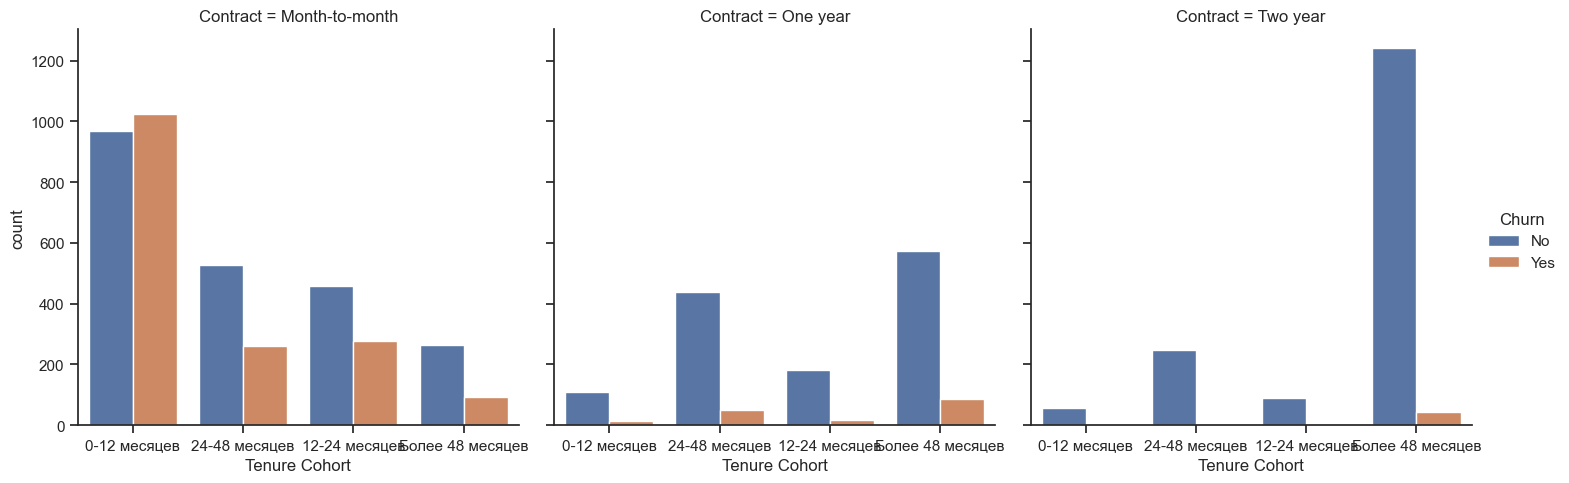

In [20]:
# Убрать сетку: 'darkgrid', 'whitegrid', 'ticks', 'dark', 'white'
sns.set(style='ticks')
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract');